### Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime, timedelta

# Runtime Configuration Parameters for Matplotlib
plt.rcParams['font.family'] = 'Verdana'
plt.style.use('ggplot')

# Importing from packaging module for version comparison
from packaging import version as packaging_version

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Importing KElbowVisualizer, SilhouetteVisualizer from yellowbrick.cluster
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Importing StandardScaler, KMeans from sklearn.preprocessing and sklearn.cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Importing metrics from sklearn
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from packaging.version import Version

c:\Users\USER\anaconda3\envs\customer\lib\site-packages\yellowbrick\style\colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
c:\Users\USER\anaconda3\envs\customer\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\USER\anaconda3\envs\customer\lib\site-packages\yellowbrick\style\rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
c:\Users\USER\anaconda3\envs\customer\lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
df=pd.read_csv('CleanRetailData.csv')

In [3]:
import warnings

# Suppress DeprecationWarning for the entire script
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Suppress DeprecationWarning for a specific function
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=DeprecationWarning)

In [4]:
df.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Date', 'Time',
       'Hour', 'Time of Day', 'Month', 'Week of the Year', 'Day of Week',
       'Sales Revenue'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Hour,Time of Day,Month,Week of the Year,Day of Week,Sales Revenue
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-04-01 10:00:00,1.95,13313.0,United Kingdom,2011-04-01,10:00:00,10,Morning,April,13,Friday,19.5
1,539993,22379,RECYCLING BAG RETROSPOT,5,2011-04-01 10:00:00,2.10,13313.0,United Kingdom,2011-04-01,10:00:00,10,Morning,April,13,Friday,10.5
2,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-04-01 10:00:00,1.25,13313.0,United Kingdom,2011-04-01,10:00:00,10,Morning,April,13,Friday,12.5
3,539993,85099B,JUMBO BAG RED RETROSPOT,10,2011-04-01 10:00:00,1.95,13313.0,United Kingdom,2011-04-01,10:00:00,10,Morning,April,13,Friday,19.5
4,539993,20682,RED RETROSPOT CHILDRENS UMBRELLA,6,2011-04-01 10:00:00,3.25,13313.0,United Kingdom,2011-04-01,10:00:00,10,Morning,April,13,Friday,19.5


### 4. Exploratory data analysis

###### 4.1. Top 10 Countries with their total order 

In [7]:
# Aggregating on Countries
country_top = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending = False).reset_index()
country_top_ten = country_top.head(10)
country_top_ten

,Country,InvoiceNo
0,United Kingdom,14779
1,Germany,391
2,France,340
3,EIRE,241
4,Belgium,88
5,Spain,77
6,Netherlands,57
7,Switzerland,44
8,Portugal,41
9,Australia,38


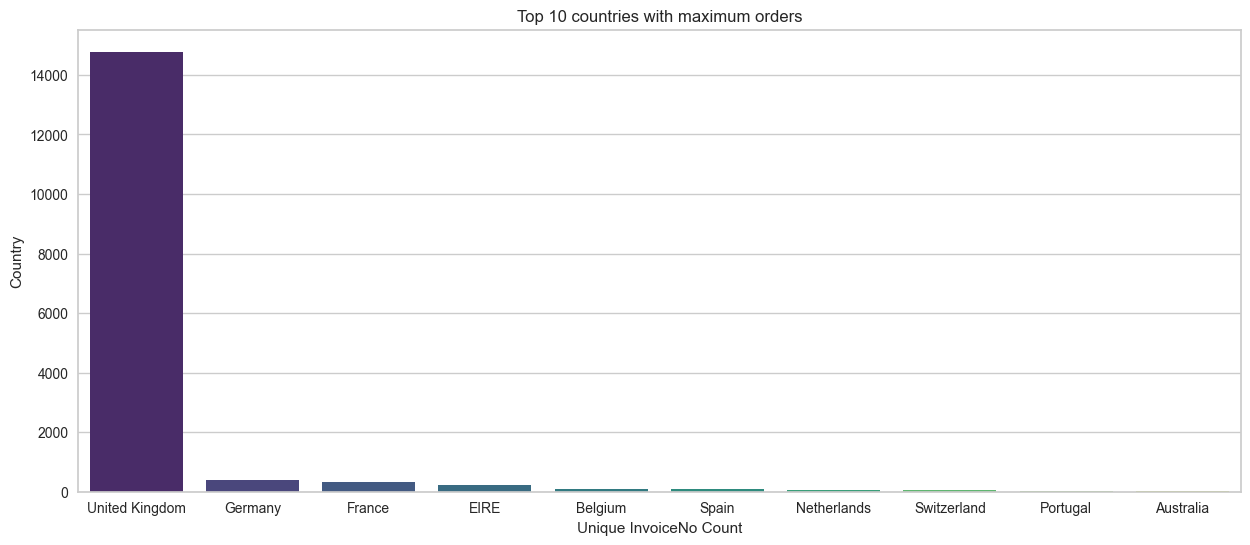

In [8]:
# Plotting
sns.barplot(data = country_top_ten, x ="Country", y = "InvoiceNo", palette ='viridis')
# Labelling
plt.title('Top 10 countries with maximum orders')
plt.xlabel('Unique InvoiceNo Count')
plt.ylabel('Country')
# Set size for plot
fig = plt.gcf()
fig.set_size_inches(15,6)

Observations:
  * The charts shows that UK has far more invoices than the other countrys with 16572 orders
  * Then Germany is in second place with 427 order. That is approximatly 30 times less voices than UK
  * From the analysis the reatil store manager can make necessary steps for the less number of order in other countrys
  * They need a quality website traffic

###### 4.2. Total Sales Revenue for Countries

In [9]:
tsls_rvn=df.groupby('Country')['Sales Revenue'].sum().sort_values(ascending = False).reset_index()
tp10_tsls_rvn=tsls_rvn.head(10)
tp10_tsls_rvn

,Country,Sales Revenue
0,United Kingdom,3656338.074
1,Germany,109646.110
2,France,96253.160
3,EIRE,94983.890
4,Spain,25851.830
5,Belgium,24178.410
6,Switzerland,23568.550
7,Portugal,15240.540
8,Norway,12741.710
9,Netherlands,10670.060


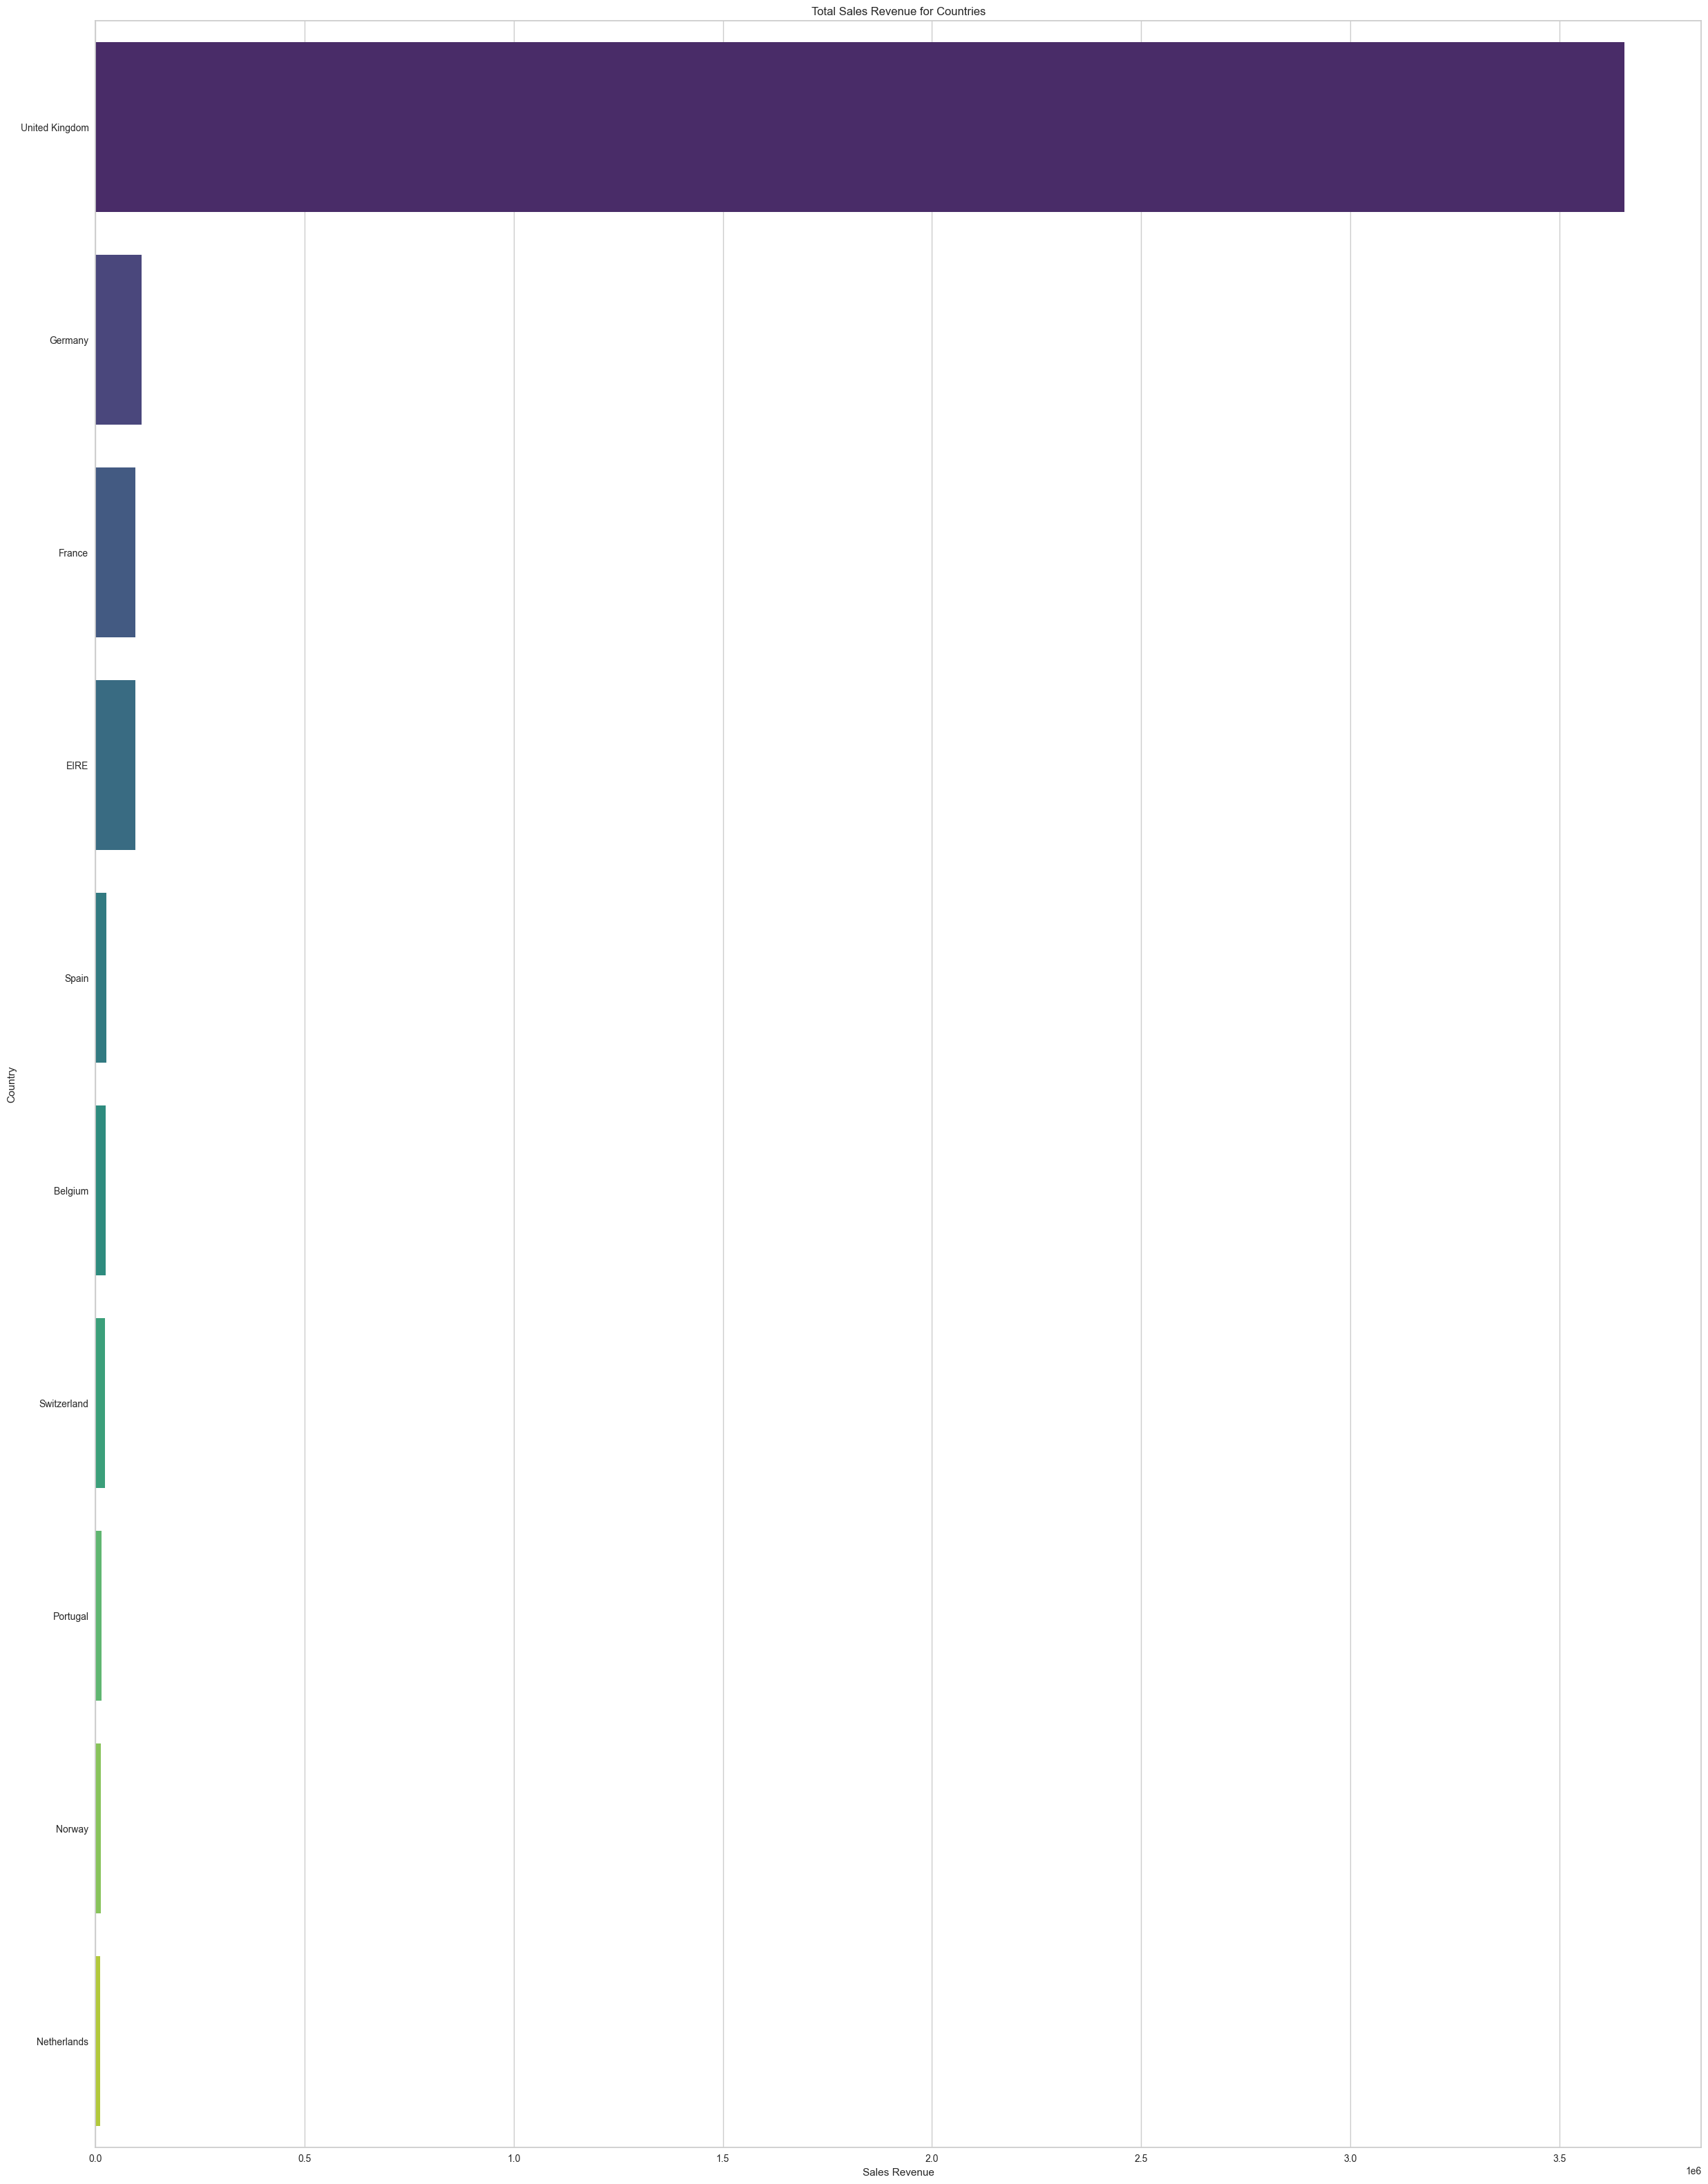

In [10]:
# Plotting
sns.barplot(data =tp10_tsls_rvn, x ="Sales Revenue", y = "Country", palette = 'viridis')
# Labelling
plt.title('Total Sales Revenue for Countries')
plt.ylabel('Country')
plt.xlabel('Sales Revenue')
# Set size for plot
fig = plt.gcf()
fig.set_size_inches(30,40)

###### 4.3. Total Quantity of Items Sold for Countries

In [11]:
qunty_sld=df.groupby('Country')['Quantity'].sum().sort_values(ascending = False).reset_index()
top_10_qnty=qunty_sld.head(10)
top_10_qnty

,Country,Quantity
0,United Kingdom,1664423
1,Germany,53476
2,France,48273
3,EIRE,41791
4,Spain,12481
5,Belgium,12239
6,Switzerland,10651
7,Portugal,7448
8,Norway,5100
9,Italy,4376


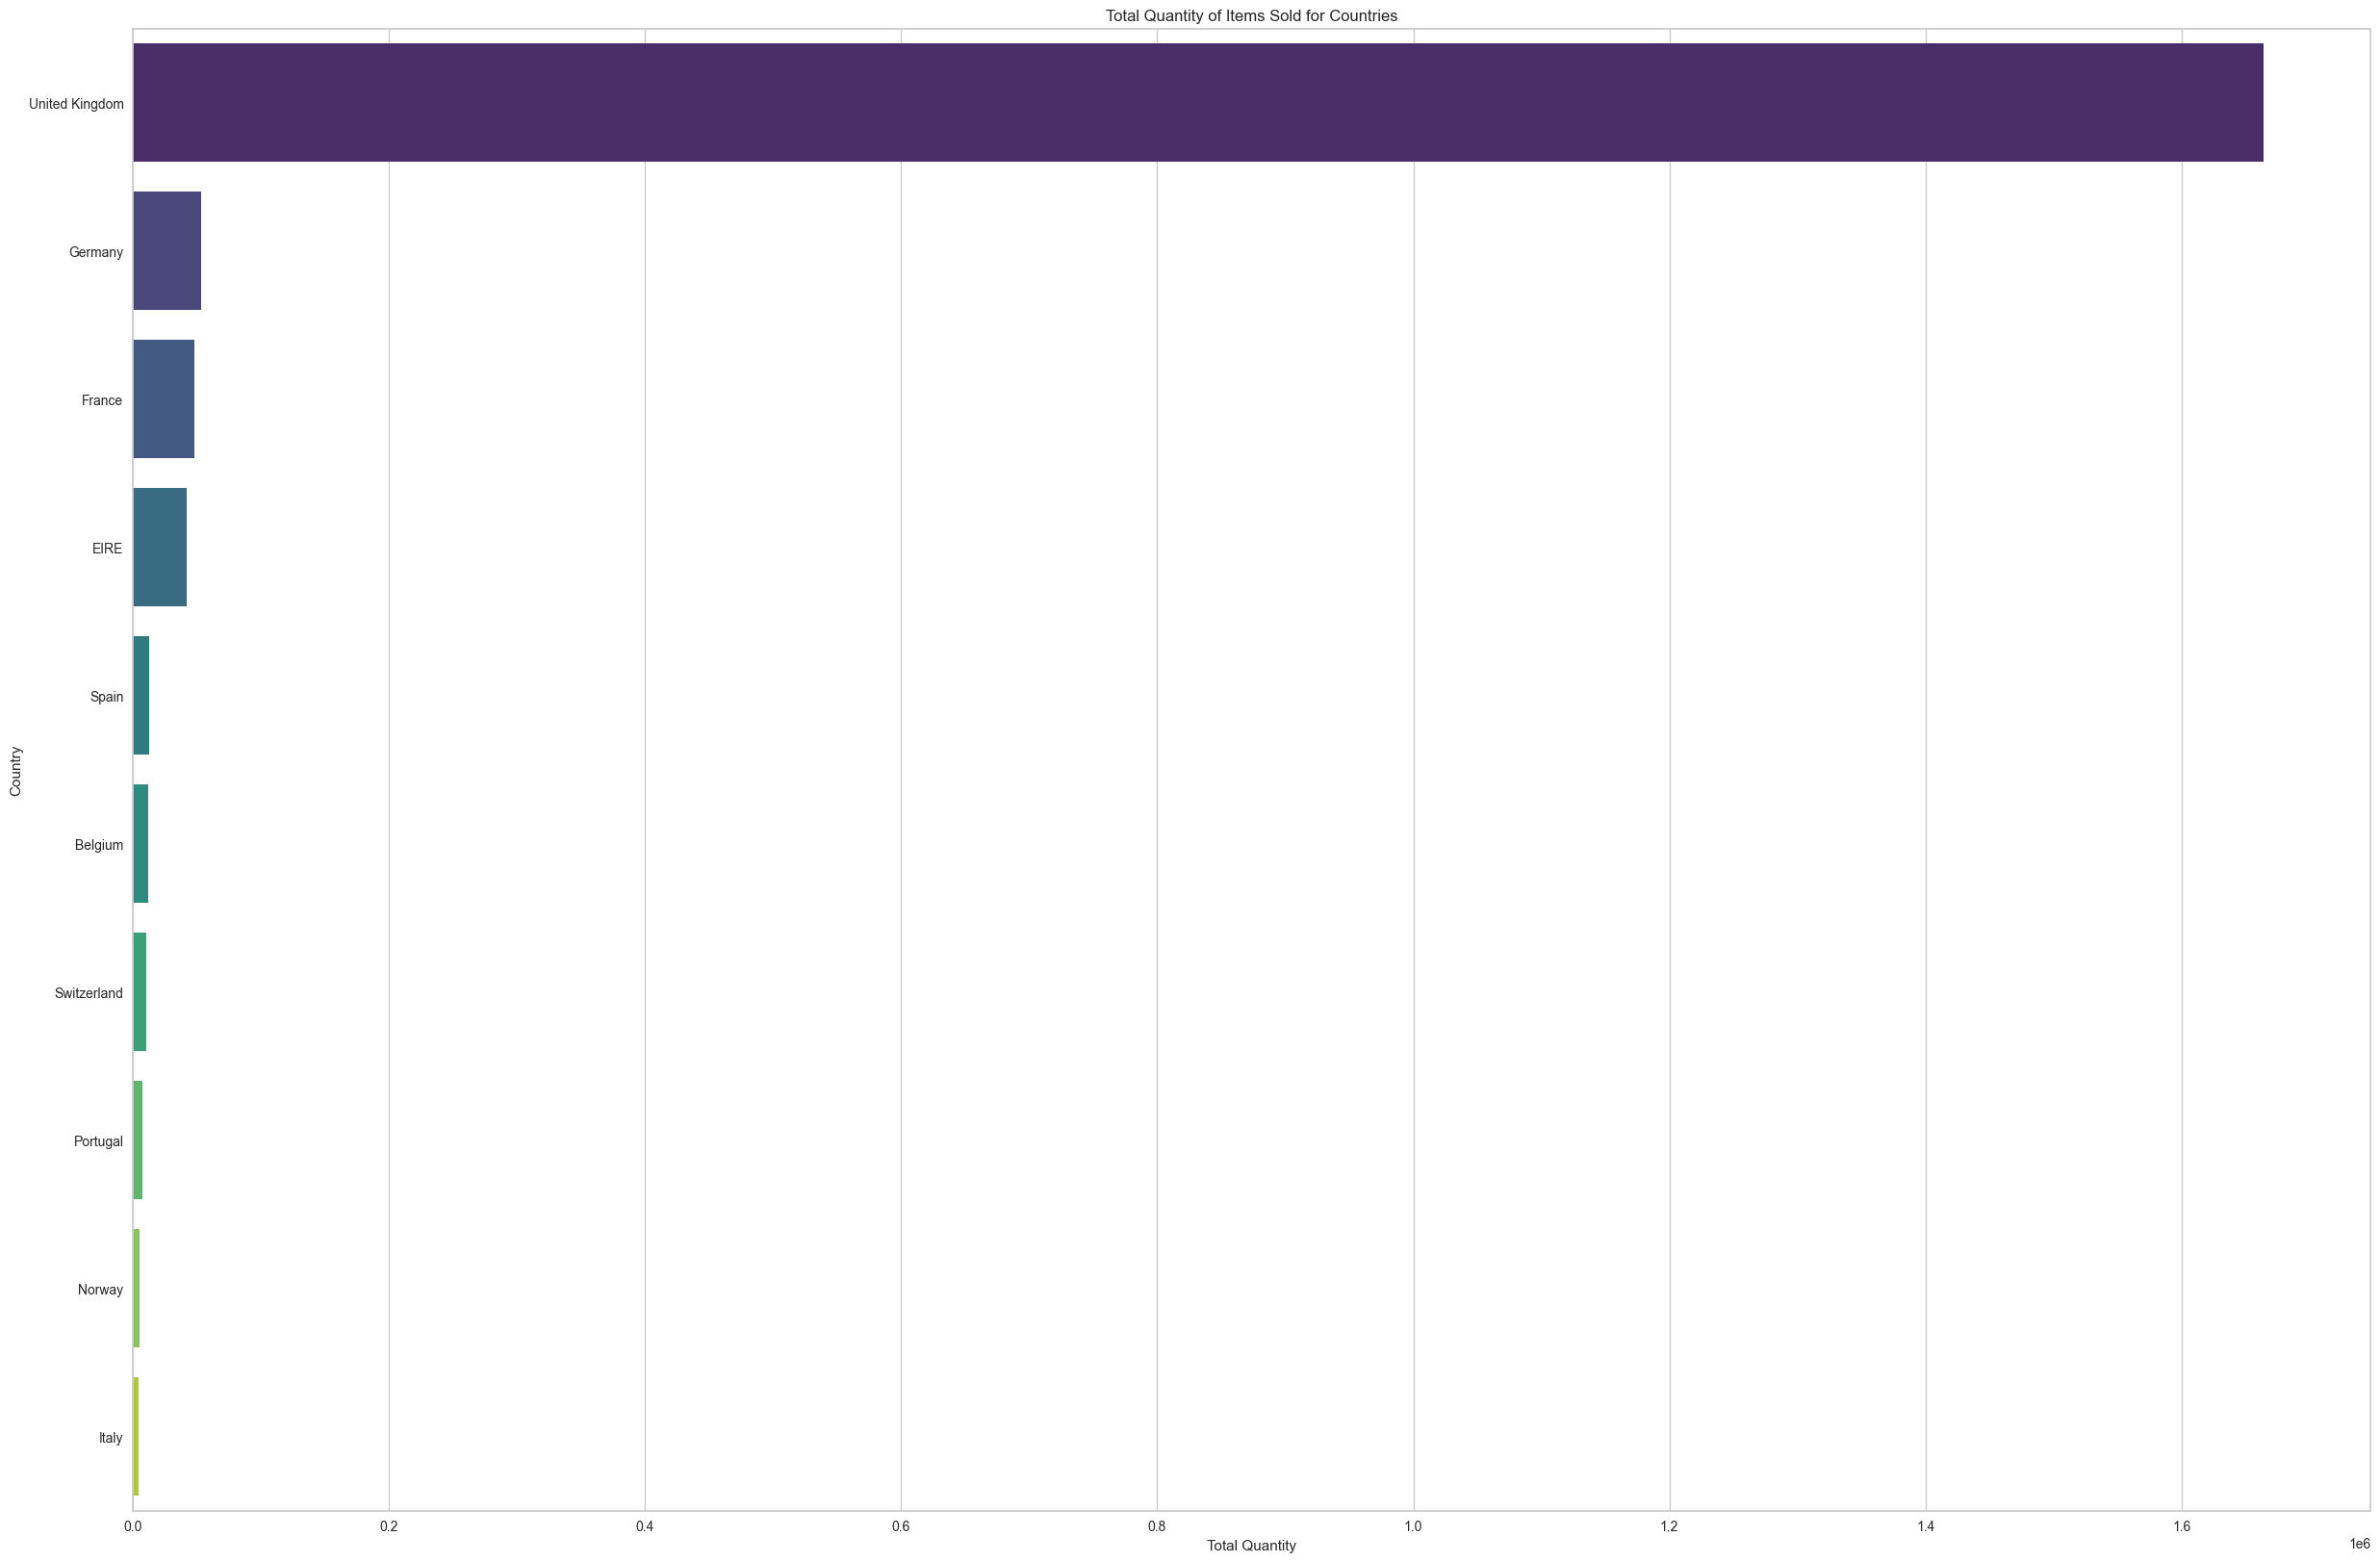

In [12]:
# Plotting
sns.barplot(data =top_10_qnty,x ="Quantity",y = "Country", palette = 'viridis')
# Labelling
plt.title('Total Quantity of Items Sold for Countries')
plt.ylabel('Country')
plt.xlabel('Total Quantity')
#set size for plot
fig = plt.gcf()
fig.set_size_inches(30,20)


###### 4.4  Monthly Statistics

In [13]:
# Function to group on Month/Date/Day of the Week/Week of the Year/Time of the Day
def group_sales_quantity(df_sls, feature):
    df_sls= df_sls[[f'{feature}','Quantity','Sales Revenue']].groupby([f'{feature}']).sum().sort_values(by= 'Sales Revenue', ascending = False).reset_index()
    return df_sls

In [14]:
# Get monthly stats dataframe
monthly_stats = group_sales_quantity(df, 'Month')

Text(0.5, 0, 'Total Sales Revenue')

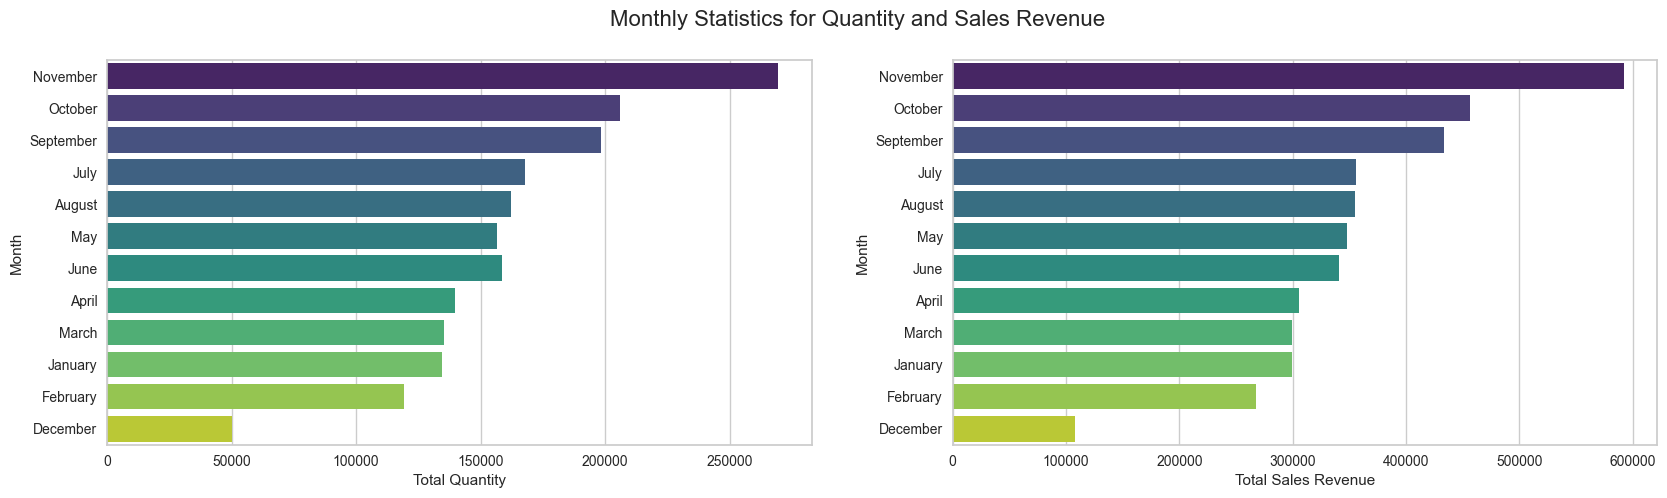

In [15]:
# Plot
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
fig.suptitle('Monthly Statistics for Quantity and Sales Revenue', fontsize=16)

# Distribution of price, after outlier handling
sns.barplot(data = monthly_stats, x = "Quantity", y = "Month" , palette = 'viridis', ax = ax[0])
ax[0].set_xlabel('Total Quantity')

# Log transformation and handling neg values with log(1+x)
sns.barplot(data = monthly_stats, x = "Sales Revenue", y = "Month", palette = 'viridis', ax = ax[1])
ax[1].set_xlabel('Total Sales Revenue')

Observations:

 The Monthly statistics for November is the highest due to the popularity of Black Friday events [affected] spending patterns in the lead up to Christmas. This causes more volatile monthly movements in seasonally adjusted data.There were rises in all retail industries in November, but it was spending on discretionary goods boosted by Black Friday sales that drove most of the increase

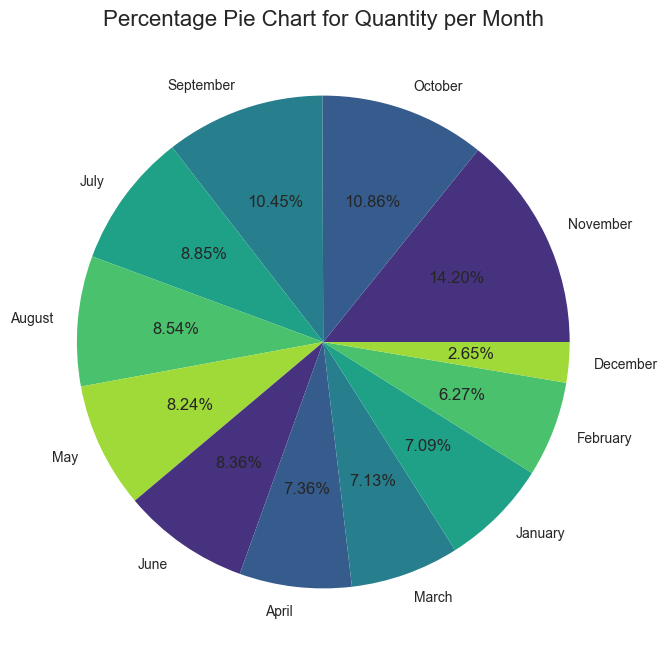

In [16]:
# Colour palette
palette_color = sns.color_palette('viridis')

# Quantity per month
plt.pie(monthly_stats['Quantity'], labels = monthly_stats['Month'], colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Quantity per Month', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

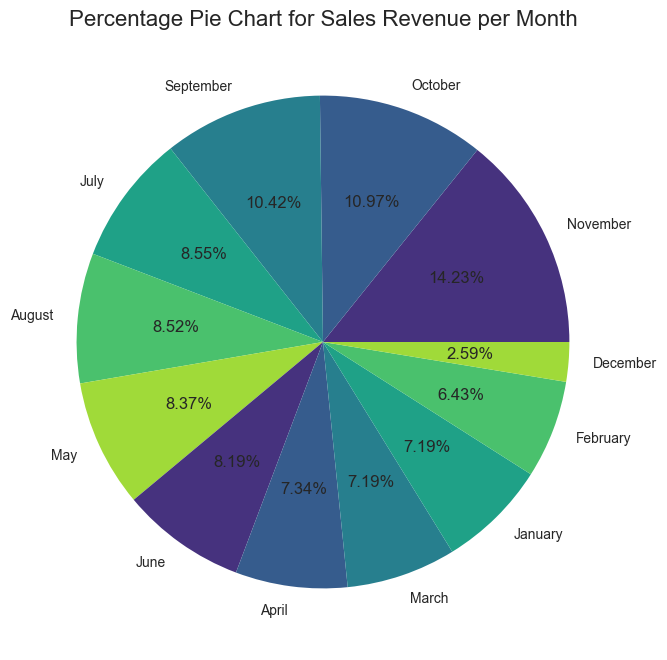

In [17]:
# Sales Revenue per month
plt.pie(monthly_stats['Sales Revenue'], labels = monthly_stats['Month'], colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Sales Revenue per Month', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

###### Observation:

   * Highest sales (by revenue and quantity) has been noted during the Fall season, which are the month of September,         October, November
   * Lowest percentage of sales (by revenue and quantity) has been noted during the Winter season (January, February, March,    April) where people are unable to leave the house due to harsh weather

###### 4.5 Daily Statistics

Text(0, 0.5, 'Day of Week')

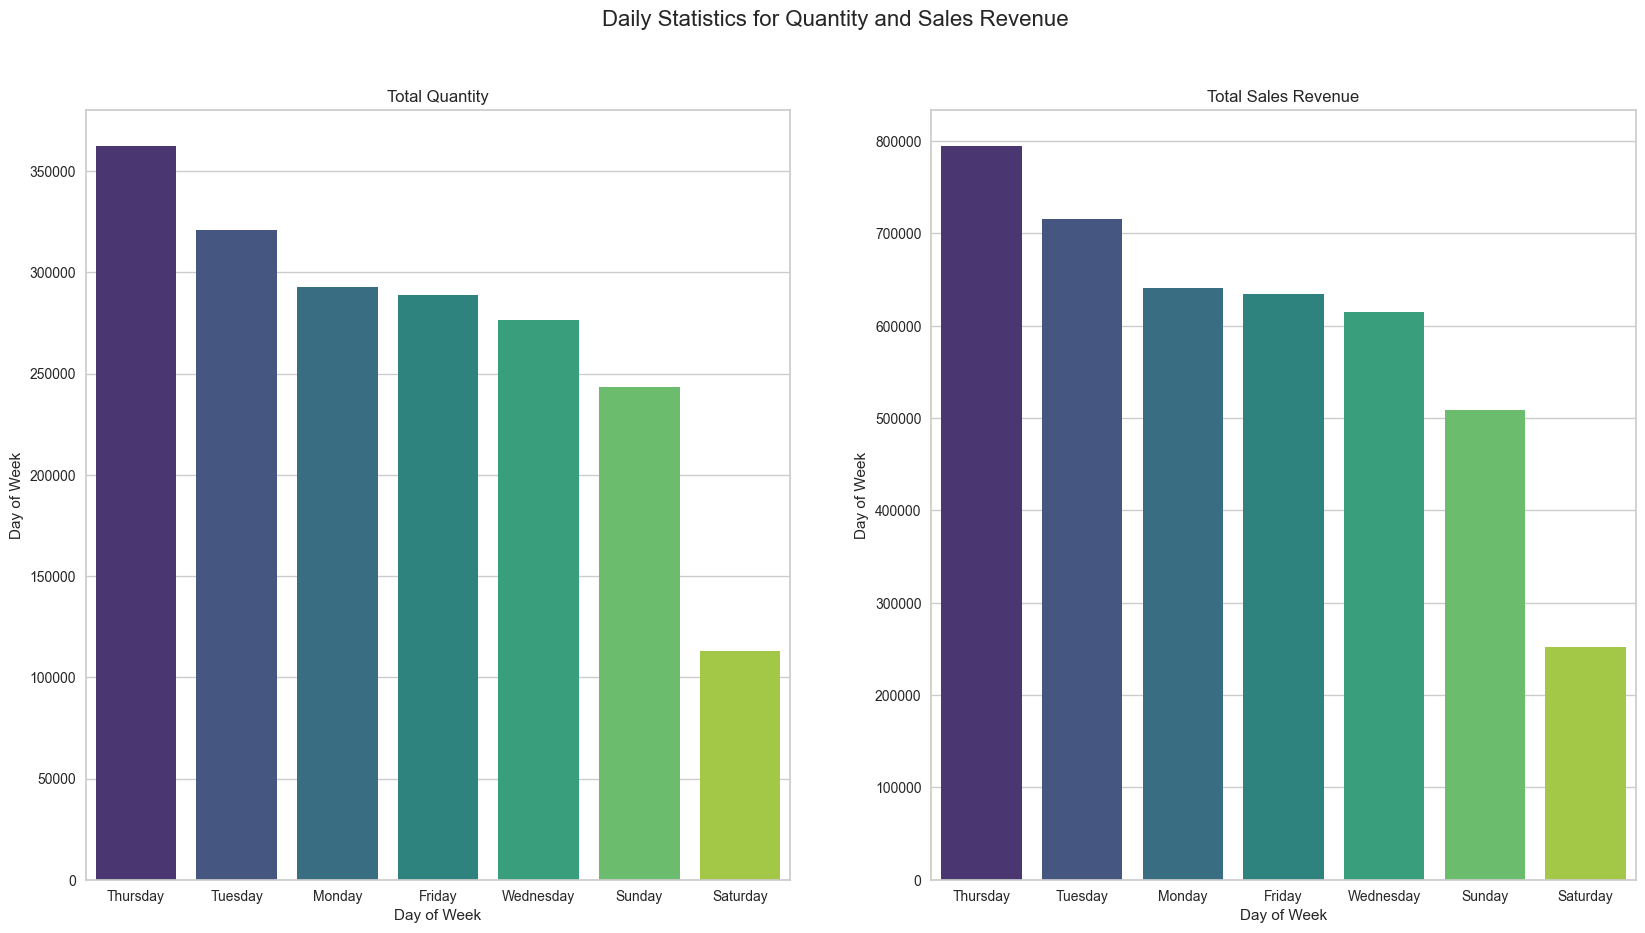

In [18]:
# Get daily stats dataframe
daily_stats = group_sales_quantity(df, 'Day of Week')
# Plot
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
fig.suptitle('Daily Statistics for Quantity and Sales Revenue', fontsize=16)

sns.barplot(data = daily_stats, x = "Day of Week", y = "Quantity" , palette = 'viridis', ax = ax[0])
ax[0].set_title('Total Quantity')
ax[0].set_ylabel('Day of Week')

sns.barplot(data = daily_stats, x = "Day of Week", y = "Sales Revenue", palette = 'viridis', ax = ax[1])
ax[1].set_title('Total Sales Revenue')
ax[1].set_ylabel('Day of Week')

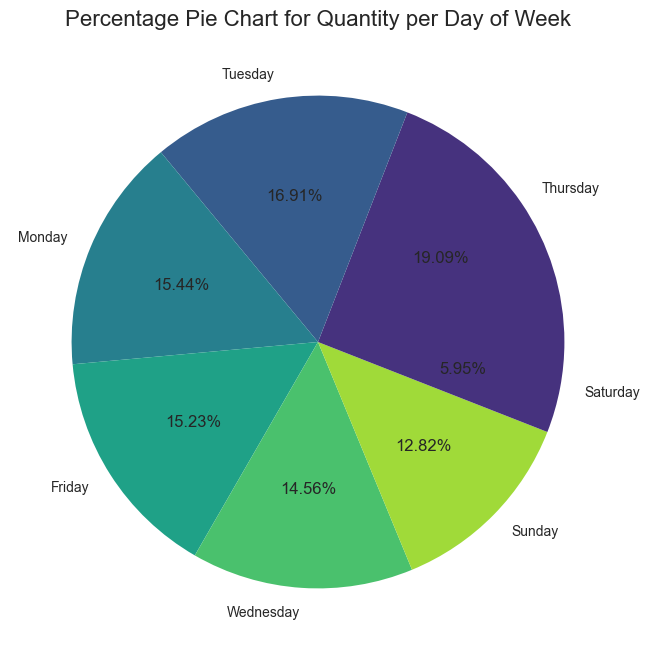

In [19]:
# Colour palette
palette_color = sns.color_palette('viridis')

# Quantity per day of week
plt.pie(daily_stats['Quantity'], labels = daily_stats['Day of Week'], colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Quantity per Day of Week', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()


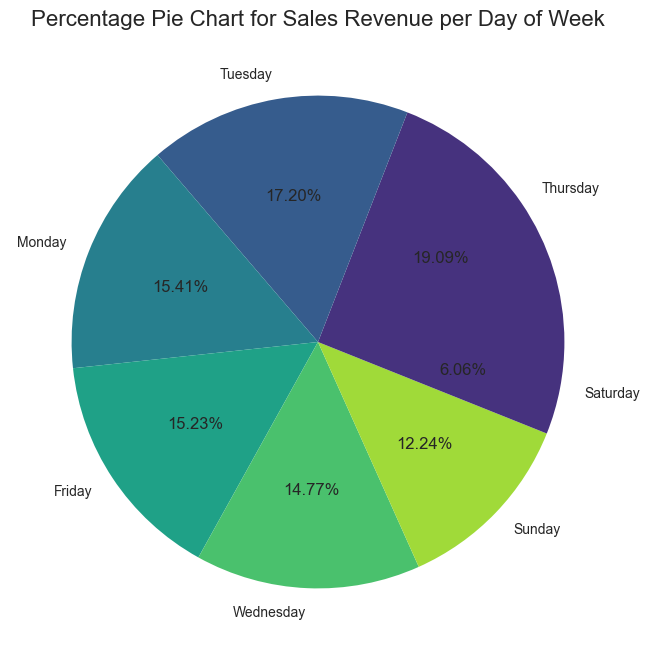

In [20]:
# Sales Revenue per Day of Week
plt.pie(daily_stats['Sales Revenue'], labels = daily_stats['Day of Week'], colors=palette_color, autopct='%.02f%%')
plt.title('Percentage Pie Chart for Sales Revenue per Day of Week', fontsize=16)

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

###### Observation:

* People buy more on Thursdays to prepare for the weekend, followed by Tuesday to prepare for the week ahead
* Least sale is noted for Sunday

In [21]:
# Top 10 customers without 'Guest Customer'
top_customers =df[df["CustomerID"] != 0].groupby("CustomerID")["InvoiceNo"].nunique().sort_values(ascending = False).reset_index().head(11)
top_customers

,CustomerID,InvoiceNo
0,14911.0,179
1,12748.0,157
2,17841.0,117
3,15311.0,82
4,14606.0,82
5,13089.0,74
6,12971.0,65
7,14527.0,50
8,15039.0,44
9,17811.0,39


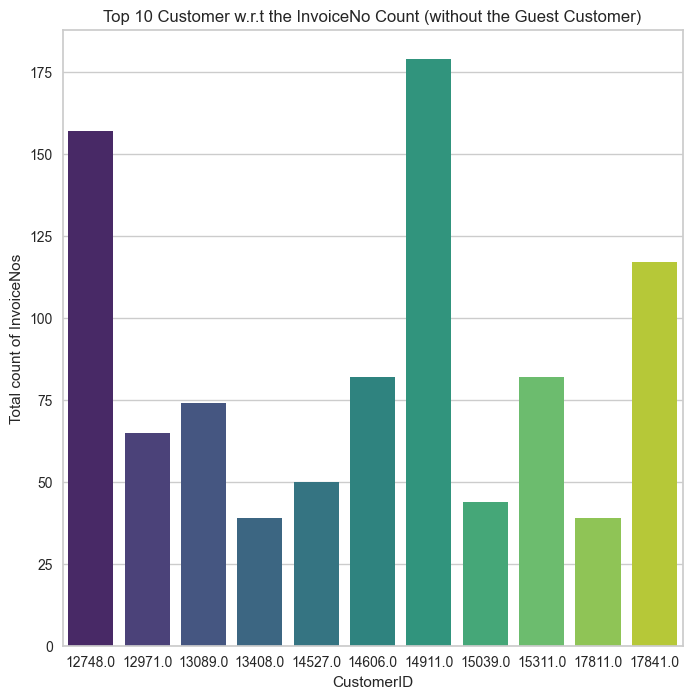

In [22]:
#plot
sns.barplot(data =top_customers, x = "CustomerID", y = "InvoiceNo" , palette = 'viridis')
plt.title('Top 10 Customer w.r.t the InvoiceNo Count (without the Guest Customer)')
plt.ylabel('Total count of InvoiceNos')
plt.xlabel('CustomerID')

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

4.6. Top products

###### 4.6.1. Top products by sold Quantity

In [23]:
# Top 10 Product Description by Quantity
top_products_qty = group_sales_quantity(df, 'Description').sort_values(ascending=False, by = "Quantity").reset_index(drop=True)
top_products_qty.drop('Sales Revenue', axis=1, inplace=True)
top_products_qty.head()


,Description,Quantity
0,ASSORTED COLOUR BIRD ORNAMENT,10156
1,JUMBO BAG RED RETROSPOT,9716
2,WHITE HANGING HEART T-LIGHT HOLDER,9613
3,LUNCH BAG RED RETROSPOT,7705
4,JAM MAKING SET PRINTED,6665


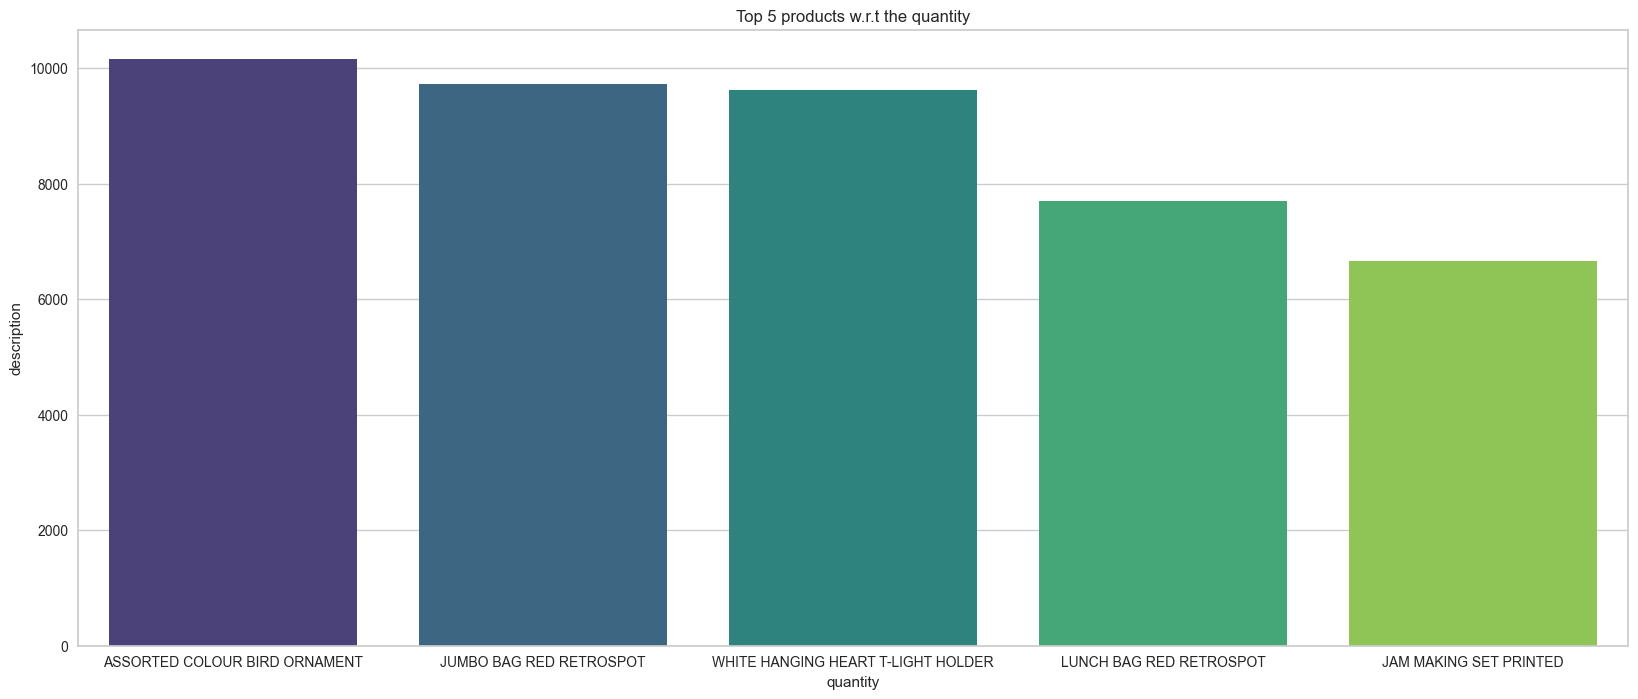

In [24]:
sns.barplot(data =top_products_qty.head(), x = "Description", y = "Quantity" , palette = 'viridis')
plt.title('Top 5 products w.r.t the quantity')
plt.ylabel('description')
plt.xlabel('quantity')

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(20,8)
plt.show()

###### 4.6.2 Top products by Sales Revenue

In [25]:
# Top 10 Product Description by Sales Revenue
top_products_revenue = group_sales_quantity(df, 'Description').sort_values(ascending=False, by = "Sales Revenue").reset_index(drop=True)
top_products_revenue.drop('Quantity', axis=1, inplace=True)
top_products_revenue.head()

,Description,Sales Revenue
0,PARTY BUNTING,32262.44
1,WHITE HANGING HEART T-LIGHT HOLDER,29866.39
2,JUMBO BAG RED RETROSPOT,23028.77
3,SPOTTY BUNTING,22060.05
4,JAM MAKING SET WITH JARS,21608.52


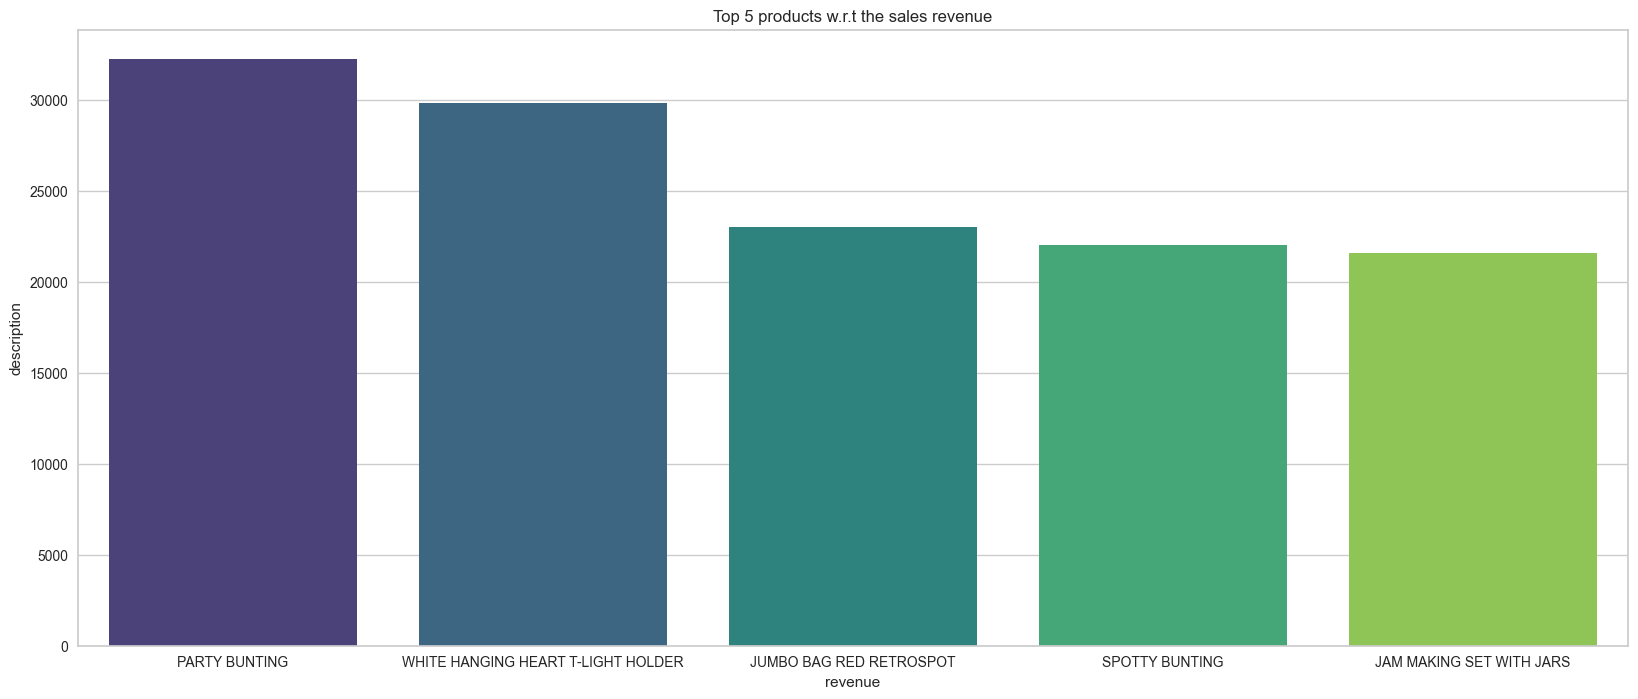

In [26]:
sns.barplot(data =top_products_revenue.head(), x = "Description", y = "Sales Revenue" , palette = 'viridis')
plt.title('Top 5 products w.r.t the sales revenue')
plt.ylabel('description')
plt.xlabel('revenue')

# Displaying chart
fig = plt.gcf()
fig.set_size_inches(20,8)
plt.show()